Topic analysis

Now lets analyse a bit the main topics of our data set


Imports

In [26]:
%store -r game_df_cleaned
%store -r swords_df_cleaned

%store -r game_text_cleaned
%store -r swords_text_cleaned

In [27]:
# !pip install textacy
# !python -m spacy download en_core_web_lg
# !pip install seaborn

In [28]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter #for counting
import seaborn as sns #for visualization
from IPython.display import Markdown, display
from siuba import *

plt.style.use('seaborn')
sns.set(font_scale=2)
nlp = spacy.load('en_core_web_lg')
nlp.max_length = 5000000

In [29]:
def text_cleaned_to_string(text: list) -> str:
    res = ""
    for l_ in text:
        for word in l_:
            res += word + " "
    return res

In [30]:

def analyze_topics(text: list):
    text_string = text_cleaned_to_string(text)
    doc = nlp(text_string)

    topics = []
    for token in doc:
        if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
            topics.append(token)

    topics = [str(x) for x in topics]

    df_nouns = pd.DataFrame(topics, columns=["Topics"])
    df_nouns
    plt.figure(figsize=(7,6))
    sns.countplot(y="Topics",
                 data=df_nouns,
                 order=df_nouns["Topics"].value_counts().iloc[:15].index)
    plt.show()

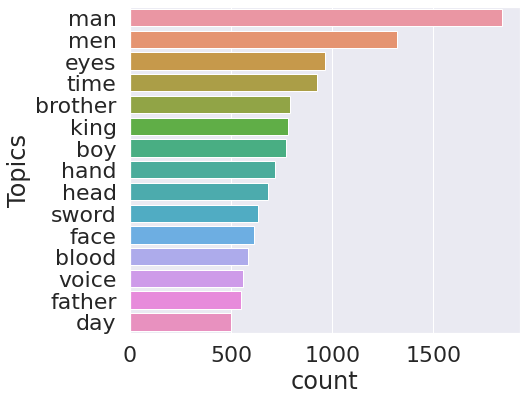

In [31]:
analyze_topics(game_text_cleaned)

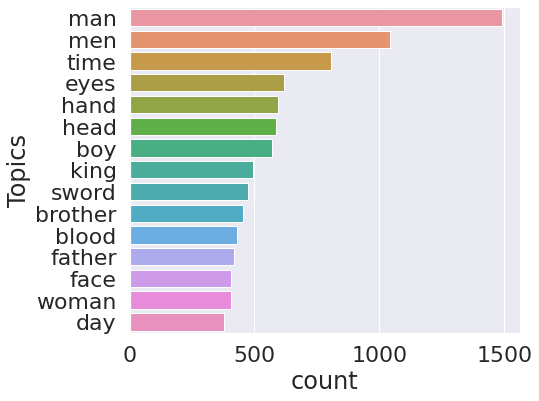

In [32]:
analyze_topics(swords_text_cleaned)

In [33]:
def get_characters(text: list):
    text_string = text_cleaned_to_string(text)
    doc = nlp(text_string)

    characters = []
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            characters.append(ent.text.strip())

#     characters = [str(x) for x in characters]

    df_nouns = pd.DataFrame(characters, columns=["Main Characters"])
    df_nouns = df_nouns[~df_nouns["Main Characters"].str.contains(']')]
    return df_nouns

def get_character_string(text: list):
    characters = get_characters(text)
    character_list = []
    for x in characters['Main Characters']:
        character_list.append(x)

    df = pd.DataFrame(character_list, columns=["Characters"])
    return  df

def main_characters(text: list):

    df_nouns = get_characters(text)
    plt.figure(figsize=(7,6))
    sns.countplot(y="Main Characters",
                 data=df_nouns,
                 order=df_nouns["Main Characters"].value_counts().iloc[:10].index)
    plt.show()

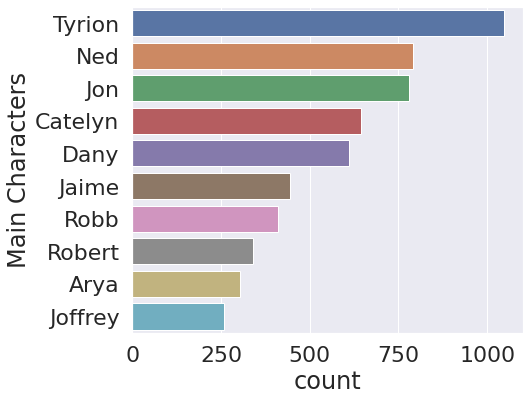

In [34]:
main_characters(game_text_cleaned)

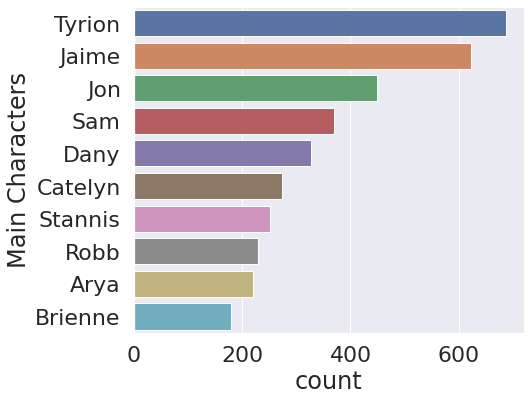

In [35]:
main_characters(swords_text_cleaned)

In [36]:
def time_analysis(text: list):
    text_string = text_cleaned_to_string(text)
    doc = nlp(text_string)

    time = []
    for ent in doc.ents:
        if ent.label_ in ["DATE"]:
            time.append(ent.text.strip())

    time = [str(x) for x in time]

    df_nouns = pd.DataFrame(time, columns=["Time"])
    plt.figure(figsize=(7,6))
    sns.countplot(y="Time",
                 data=df_nouns,
                 order=df_nouns["Time"].value_counts().iloc[:15].index)
    plt.show()

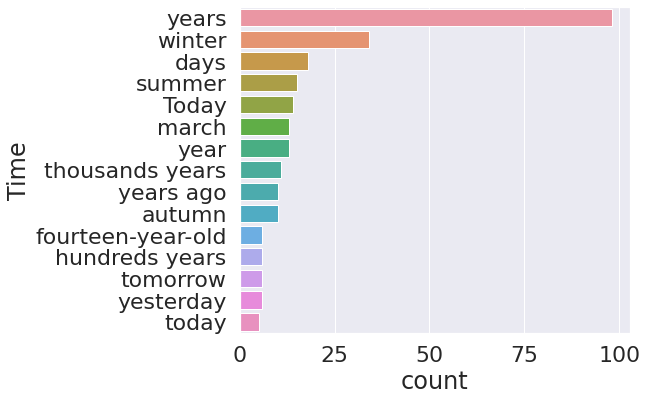

In [37]:
time_analysis(game_text_cleaned)

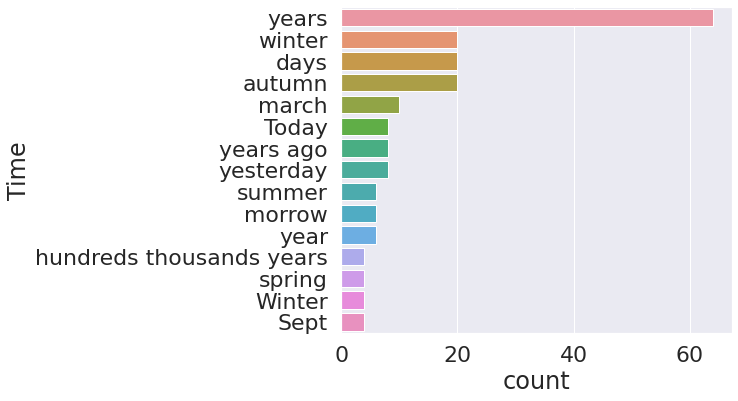

In [38]:
time_analysis(swords_text_cleaned)

In [87]:
def characters_deaths(characters : pd.DataFrame, text : list) -> pd.DataFrame:
    
    text_string = text_cleaned_to_string(text)
    to_search = pd.DataFrame({
        "word" : text_string.split()
    })
    # we build a dataframe containing the characters and a flag(default=False) which will be True later if the character died
    deaths = characters.assign(dead = 'False')
    deaths = deaths.drop_duplicates(subset=['Characters'], ignore_index=True)

    flags = ['dead', 'died', 'killed', 'murdered', 'stabbed ', 'cut off', 'poisoned', 'hanged']
    last_character = ""
    for word in to_search['word']:
        for x in deaths['Characters']:
            if x == word:
                last_character = x
                break
        if word in flags and last_character != "":
            deaths.loc[deaths['Characters'] == last_character, 'dead']= 'True'

    return deaths



In [72]:
my_characters = get_character_string(game_text_cleaned)
my_characters_filtered = count(my_characters, _.Characters, ascending=False)
my_characters_filtered = my_characters_filtered.sort_values(by='n', ascending=False)
my_characters_filtered.drop(columns='ascending')

Characters     n
3209                                 Tyrion  1049
2088                                    Ned   791
1380                                    Jon   780
440                                 Catelyn   645
608                                    Dany   612
...                                     ...   ...
1593          Kingsguard Aemon Dragonknight     1
1594               Kingsguard Grand Pycelle     1
1602           Kingsguard Served Kingslayer     1
1605                       Kingsguard Watch     1
3668  —WYMAN White —HOWLAND Greywater —MORS     1

[3669 rows x 2 columns]

In [88]:
# print(my_characters_filtered[:50])
dead_df = characters_deaths(my_characters_filtered[:50], game_text_cleaned)
dead_df

GAME
OF
THRONES
Book
Song
Ice
George
Maps
North
South
Prologue
Chapter
1
Chapter
2
Chapter
3
Chapter
4
Chapter
5
Chapter
6
Chapter
7
Chapter
8
Chapter
9
Chapter
10
Chapter
11
Chapter
12
Chapter
13
Chapter
14
Chapter
15
Chapter
16
Chapter
17
Chapter
18
Chapter
19
Chapter
20
Chapter
21
Chapter
22
Chapter
23
Chapter
24
Chapter
25
Chapter
26
Chapter
27
Chapter
28
Chapter
29
Chapter
30
Chapter
31
Chapter
32
Chapter
33
Chapter
34
Chapter
35
Chapter
36
Chapter
37
Chapter
38
Chapter
39
Chapter
40
Chapter
41
Chapter
42
Chapter
43
Chapter
44
Chapter
45
Chapter
46
Chapter
47
Chapter
48
Chapter
49
Chapter
50
Chapter
51
Chapter
52
Chapter
53
Chapter
54
Chapter
55
Chapter
56
Chapter
57
Chapter
58
Chapter
59
Chapter
60
Chapter
61
Chapter
62
Chapter
63
Chapter
64
Chapter
65
Chapter
66
Chapter
67
Chapter
68
Chapter
69
Chapter
70
Chapter
71
Chapter
72
House
Greyjoy
House
Martell
House
Targaryen
APPENDIX—The
Houses
House
Baratheon
House
Stark
House
Lannister
House
Arryn
House
Tully
House
Tyrell
previous


offered
looked
miserable
honorable
thing
gentle
good
appease
son
botch
thought
battles
hard
listened
Theon
rule
Bran
Rickon
alive
safe
Balon
chanced
time
reached
cost
thought
bargain
lose
touched
happened
Robb
shook
Ser
Ser
Ryman
dull-witted
Black
Walder
named
color
promise
sisters
loath
killed
Jeyne
begged
House
Frey
grievous
meant
Ser
Stevron
died
Olyvar
loyal
squire
king
asked
stay
Ser
Ryman
Greatjon
urged
attack
midst
thought
arrange
matches
Ser
Wendel
Manderly
offered
Greatjon
tells
uncles
Walder
prickly
wanted
grandfather
appease
offer
hoary
brigands
son
fattest
man
broken
slighted
honor
Twins
choosing
bride
lesser
Robb
bristled
Westerlings
blood
ancient
descended
Kings
Rock
Westerlings
Jeyne
Westerling
queen
King
Maegor
years
salt
rankled
older
houses
Freys
insult
hear
Jon
Arryn
disinclined
foster
father
refused
offer
daughters
inclined
head
brother
rejoined
Brynden
Blackflsh
continue
Robb
sounded
kill
cup
audience
started
Catelyn
asked
question
troubling
entered
Grey
haunch
tol

Characters  ascending     n   dead
0             Tyrion      False  1049   True
1                Ned      False   791   True
2                Jon      False   780   True
3            Catelyn      False   645   True
4               Dany      False   612   True
5              Jaime      False   445   True
6               Robb      False   411   True
7             Robert      False   341   True
8               Arya      False   304   True
9            Joffrey      False   259   True
10               Sam      False   259   True
11           Stannis      False   214   True
12         Lannister      False   203   True
13            Cersei      False   153   True
14              Lysa      False   147   True
15             Luwin      False   137   True
16        Khal Drogo      False   133  False
17             Tywin      False   114   True
18             Bronn      False   108   True
19            Rodrik      False   108   True
20  Tyrion Lannister      False   106  False
21           Brienne      False    90   True
22            Gregor      False    90   True
23      Littlefinger      False    88   True
24             Grenn      False    87   True
25      Eddard Stark      False    79  False
26             Stark      False    77   True
27             Hodor      False    71   True
28          Jon Snow      False    70  False
29             Mance      False    69   True
30         Barristan      False    65   True
31           Viserys      False    64   True
32           Ygritte      False    63   True
33    Sandor Clegane      False    61  False
34             Petyr      False    59   True
35           Mormont      False    59   True
36            Starks      False    58   True
37     Catelyn Stark      False    58  False
38             Kevan      False    56   True
39             Renly      False    56   True
40        Lannisters      False    53   True
41             Drogo      False    52   True
42            Walder      False    51   True
43   Jaime Lannister      False    50  False
44             Meera      False    50   True
45         Jon Arryn      False    50  False
46     Theon Greyjoy      False    49  False
47             Grace      False    49   True
48              Shae      False    48   True
49             Hound      False    48   True

In [46]:
dead_df[dead_df['dead'] == 'True']

Empty DataFrame
Columns: [Characters, dead]
Index: []